<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>







# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# the list of edges, edges as tuples
listOfEdges=[(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)]

# create nodes and edges
G.add_edges_from(listOfEdges)

The las code chunk created your first graph!

## Basic Elements

**G** is the  object:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes and their attributes (nothing yet)
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You just see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [6]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [10]:
# You see edges and their attributes (nothing yet)
G.edges.data()

EdgeDataView([(1, 2, {}), (1, 5, {}), (2, 5, {}), (2, 3, {}), (5, 4, {}), (3, 4, {}), (4, 6, {})])

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

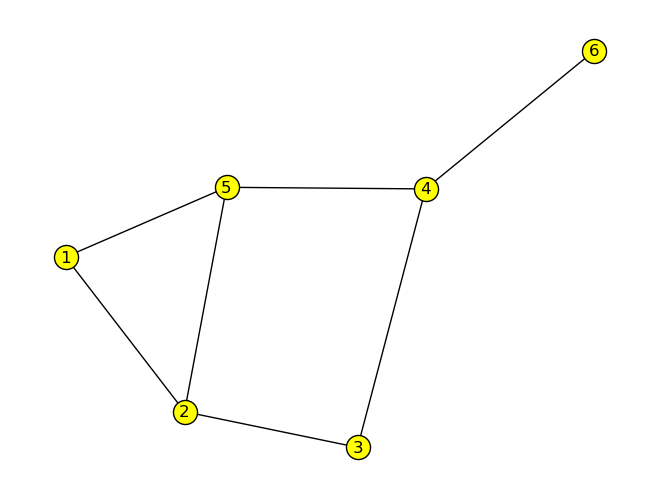

In [11]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')



### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

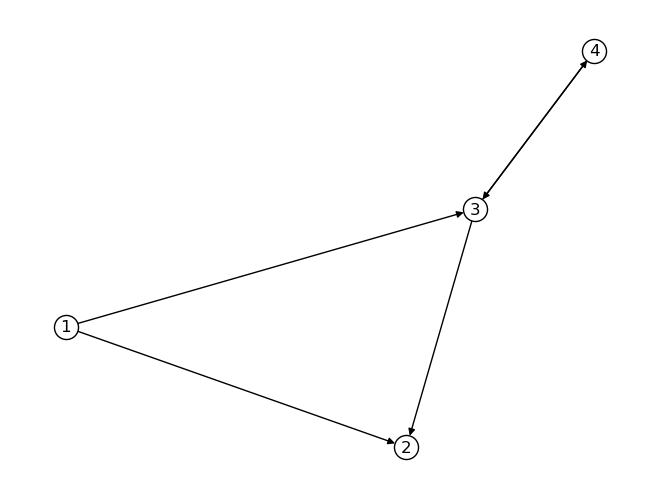

In [12]:
# create DIRECTED graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric** (be "a parent of" belongs to this kind).

## Attributes

Nodes can have attributes:

In [27]:
# adding attributes, just female/male for simplicity
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='female'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='male'

In [28]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'female', 3: 'female', 4: 'male'}

Above, we had few nodes, so we added a variable by hand.

Let me set the color of the node based on _sex_, this time NOT manually:

In [29]:
# requesting attribute as "items"
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'female'), (3, 'female'), (4, 'male')])

In [30]:
# coding to assign color
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'red', 3: 'red', 4: 'blue'}

In [31]:
# then
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")

# see
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'female', 'color': 'red'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'male', 'color': 'blue'}})

In [32]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'red', 'red', 'blue'])

Attributes can serve for some computational purposes, but also help to visually find structures.

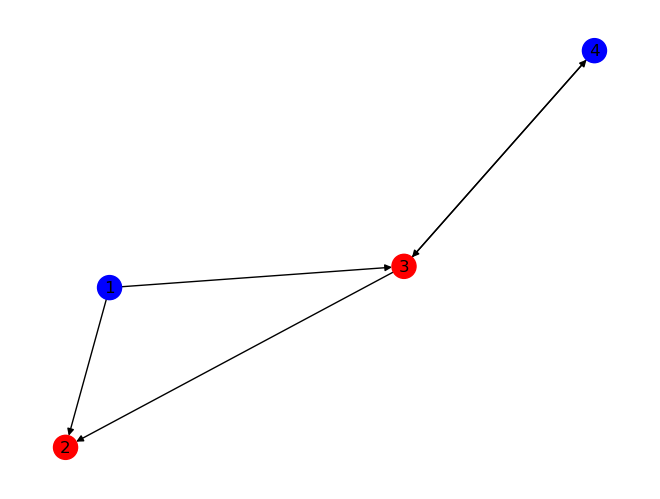

In [33]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [34]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [35]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [ ]:
# if
{i:'magenta' if v<=1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

In [ ]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [ ]:
# see edges and attributes
dG.edges.data()

Let's use edge attributes:

In [ ]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

The color of edges:

In [ ]:
nx.get_edge_attributes(dG,'color').values()

In [ ]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
node_colors=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.circular_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=node_colors)
# draw edges
nx.draw_networkx_edges(dG, pos,width=list(weight_values.values()),
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,label_pos=0.25,
                               edge_labels=weight_values)

### Exporting

Networkx does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [ ]:
nx.write_gml(dG, "dG.gml")

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="https://github.com/DACSS-CSSmeths/Networks_intro/blob/main/graphdata/paper.png?raw=true" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="https://github.com/DACSS-CSSmeths/Networks_intro/blob/main/graphdata/dataRed.png?raw=true" width="900">

This is an spreadsheet, representing the information above:

In [38]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vSHI_TY6rh9zEctvxnk83Vg88m1uXAEPA9DYT__TYOt5eS2mFovlraOXkaUcV8YZhbU30u34NfaMpY1/pubhtml",1200,350)

Let's use the data from the spreadsheet to prepare our table:

In [39]:
# reading in
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vSHI_TY6rh9zEctvxnk83Vg88m1uXAEPA9DYT__TYOt5eS2mFovlraOXkaUcV8YZhbU30u34NfaMpY1/pub?gid=1612677630&single=true&output=csv"
FigueData = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

We got this:

In [ ]:
FigueData.head()

As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [ ]:
FigueData.columns

The **adjacency matrix** does not need the _multinacional_ attribute column, then:

In [ ]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

It is easy to turn the adjacency matrix into a graph:

In [ ]:
import networkx as nx
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

In [ ]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [ ]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

In [ ]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [ ]:
dict(zip(FigueData.index,FigueData['Multinacional']))

Then, I can use that to add an attribute to the node:

In [ ]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

In [ ]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")
nx.draw_random(EliteNet,node_color=nx.get_node_attributes(EliteNet, "color").values())

# Case: Top Seattle

I found a webpage about top people in Seattle:

In [ ]:
from IPython.display import IFrame
IFrame('https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow', 800, 350)

We have the network as **edgelist**:

In [ ]:
IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVt6mWtTfzTKgjwtfbWogongjhVLSK1A1hQPsJMuYWnZqebdkkAjTwhRGBSih2ZxK_PT-dEbJ-UNMG/pubhtml', 800, 350)

Creating from edgelist:

In [ ]:

# link a GoogleDrive como un Excel
linkGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vQVt6mWtTfzTKgjwtfbWogongjhVLSK1A1hQPsJMuYWnZqebdkkAjTwhRGBSih2ZxK_PT-dEbJ-UNMG/pub?output=xlsx"

# leyendo archivo de red
edges=pd.read_excel(linkGoogle,   
                        sheet_name='edges') # la tabla tiene este nombre

# creando red dirigida
Seattle= nx.from_pandas_edgelist(edges, edge_attr=True,create_using=nx.DiGraph)

In [ ]:
len(Seattle.edges())

In [ ]:
type(Seattle)

# Case: Fifa 2022 world cup

Let me use some information about countries from the 2022 [Fifa World Cupe](https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_squads). I have the data on GitHub:

In [ ]:
fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/graphdata/fifa2022.csv"
fifa=pd.read_csv(fifaLink)
fifa.head()

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite

In [ ]:
bipartite.sets?

In [ ]:
import matplotlib.pyplot as plt

B = nx.Graph()
members=[1,2,3,4]
clubs=['a','b','c']
B.add_nodes_from(members, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(clubs, bipartite=1)
B.add_edges_from([(1,'a'), (1,'b'), (2,'b'), (2,'c'), (3,'c'), (4,'a')])

clubs,members = bipartite.sets(B)
# Draw bipartite graph
pos = nx.bipartite_layout(B, clubs,align='horizontal',aspect_ratio=1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]
nx.draw(B, pos=pos, with_labels=True, node_color = color_list)
plt.show()

In [ ]:
fifanet = nx.Graph()
fifanet.add_nodes_from(fifa.nationality, bipartite=0) # Add the node attribute "bipartite"
fifanet.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet.add_edges_from([c for c in zip(fifa.nationality,fifa.club)])

In [ ]:
nx.is_connected(fifanet)

In [ ]:
nx.draw(fifanet,with_labels=True)

In [ ]:
clubs,nationalities = bipartite.sets(fifanet)
# Draw bipartite graph
pos = nx.bipartite_layout(fifanet, clubs,align='horizontal',aspect_ratio=1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet.nodes.data('bipartite')]
nx.draw(fifanet, pos=pos, with_labels=True, node_color = color_list)
plt.show()

In [ ]:
!pip install pyvis

In [ ]:
# so...
colors={i:'red' if v==1 else 'blue' for i,v in nx.get_node_attributes(fifanet, "bipartite").items()}

# set color
nx.set_node_attributes(fifanet, colors, "color")

In [ ]:
# id as label
colors={i:str(i) for i in dG.nodes()}
# nx.set_node_attributes(dG, labels, "color")

In [ ]:
from pyvis.network import Network

Gvis = Network(notebook=True,cdn_resources='remote')
Gvis.from_nx(fifanet.copy()) # create a copy!
# Gvis.show('Gvis.html')

In [ ]:
nx.write_gml(fifanet, "fifanet.gml")

In [ ]:
member_nodes = {n for n, d in fifanet.nodes(data=True) if d["bipartite"] == 0}
club_nodes = set(fifanet) - member_nodes

In [ ]:
G = bipartite.projected_graph(fifanet, member_nodes)

In [ ]:
nx.is_connected(G)

In [ ]:
nx.draw_spectral(G,with_labels=True)

In [ ]:
Gvis = Network(notebook=True,cdn_resources='remote')
Gvis.from_nx(G.copy()) # create a copy!
Gvis.toggle_stabilization(True)
Gvis.show_buttons()
# Gvis.show('Gvis.html')

In [ ]:
nx.write_gml(G, "countries_fifanet.gml")